# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

#### Описание данных
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:
* сalls — количество звонков,
* minutes — суммарная длительность звонков в минутах,
* messages — количество sms-сообщений,
* mb_used — израсходованный интернет-трафик в Мб,
* is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

## Открытие и изучение данных

In [1]:
# Импорт библиотек

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

In [2]:
from warnings import simplefilter
simplefilter(action='ignore')

In [3]:
# Загрузка датасета

try:
    df = pd.read_csv('/datasets/users_behavior.csv')
except:
    df = pd.read_csv('F:/users_behavior.csv')
    
display(df.shape)
display(df.info())
df.head()

(3214, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


None

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


**Загрузили необходмые библиотеки и данные.**

## Разбиение данных на выборки

In [4]:
# Разделим исходные данные на обучающую, валидационную и тестовую выборки в соотношении 60-20-20

features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345) 

features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345) 

In [5]:
# Убедимся в правильности разделения датасета

print('Размер всего датасета:', df.shape, '{:.0%}'.format(len(df)/len(df)))
print('Размер фичей обучающей выборки:', features_train.shape, '{:.0%}'.format(len(features_train)/len(df)))
print('Размер фичей валидационной выборки:', features_valid.shape, '{:.0%}'.format(len(features_valid)/len(df)))
print('Размер фичей тестовой выборки:', features_test.shape, '{:.0%}'.format(len(features_test)/len(df)))
print('Размер целевого признака обучающей выборки:', target_train.shape, '{:.0%}'.format(len(target_train)/len(df)))
print('Размер целевого признака валидационной выборки:', target_valid.shape, '{:.0%}'.format(len(target_valid)/len(df)))
print('Размер целевого признака тестовой выборки:', target_test.shape, '{:.0%}'.format(len(target_test)/len(df)))

Размер всего датасета: (3214, 5) 100%
Размер фичей обучающей выборки: (1928, 4) 60%
Размер фичей валидационной выборки: (643, 4) 20%
Размер фичей тестовой выборки: (643, 4) 20%
Размер целевого признака обучающей выборки: (1928,) 60%
Размер целевого признака валидационной выборки: (643,) 20%
Размер целевого признака тестовой выборки: (643,) 20%


**Получили обучающую, валидационную и тестовую выборки в соотношении 60-20-20.**

## Исследование модели

In [6]:
# Проведем исследование модели класса Дерево решений. Подберем гиперпараметры, чтобы получим лучший accuracy_score

best_model_dt = None
best_depth = 0
best_result = 0
best_criterion = ''

for criterion in ['gini', 'entropy']:
    for depth in range(1, 11):
    
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth, criterion=criterion)
        model.fit(features_train, target_train)
        predict_valid = model.predict(features_valid)
        result = accuracy_score(target_valid, predict_valid)
        if result > best_result:
            best_result = result
            best_model_dt = model
            best_depth = depth
            best_criterion = criterion
        
print('Лучший результат accuracy модели Дерево решений: \n\n', best_result,\
      '\n глубина:', best_depth, '\n критерий:', best_criterion)

Лучший результат accuracy модели Дерево решений: 

 0.7853810264385692 
 глубина: 3 
 критерий: gini


In [7]:
# Проведем исследование модели класса Случайный лес. Подберем гиперпараметры, чтобы получим лучший accuracy_score

best_model_rf = None
best_depth = 0
best_result = 0
best_est = 0
best_criterion = ''
criterions = ['gini', 'entropy']

for criterion in criterions:
    for depth in range(1, 11):
        for est in range(10, 51, 10):
    
            model = RandomForestClassifier(random_state=12345, max_depth=depth, criterion=criterion, n_estimators=est)
            model.fit(features_train, target_train)
            predict_valid = model.predict(features_valid)
            result = accuracy_score(target_valid, predict_valid)
            if result > best_result:
                best_result = result
                best_model_rf = model
                best_depth = depth
                best_criterion = criterion
                best_est = est
                
print('Лучший результат accuracy модели Случайный лес: \n\n', \
      best_result, '\n глубина:', best_depth, '\n критерий:', best_criterion, '\n число деревьев', best_est)

Лучший результат accuracy модели Случайный лес: 

 0.8087091757387247 
 глубина: 8 
 критерий: gini 
 число деревьев 40


In [8]:
# Проведем исследование модели класса Логистическая регрессия. Подберем гиперпараметры, чтобы получим лучший accuracy_score

best_model_lr = None
best_result = 0
best_solver = ''
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']


for solver in solvers:
    model = LogisticRegression(random_state=12345, solver=solver)
    model.fit(features_train, target_train)
    predict_valid = model.predict(features_valid)
    result = accuracy_score(target_valid, predict_valid)
    if result > best_result:
        best_result = result
        best_model_lr = model
        best_solver = solver                
        
print('Лучший результат accuracy модели Логистическая регрессия: \n\n', \
      best_result, '\n алгоритм:', best_solver)

Лучший результат accuracy модели Логистическая регрессия: 

 0.7558320373250389 
 алгоритм: newton-cg


**Исследование показало, что модель, построенная на алгоритме случайного леса при глубине 8 и 40 деревьях, дает лучший результат (81%). Но она и самая времязатратная. Довольно быстрая и с чуть худшим результом (79%) - модель на алгоритме дерева решений при глубине 3. И худший результат (76%) показала модель на алгоритме логистической регрессии.**

## Проверка модели на тестовой выборке

In [9]:
# Проведем проверку выбранной модели с лучшим результатом (модель на алгоритме случайного леса) на тестовой выборке

predict_test = best_model_rf.predict(features_test)
result = accuracy_score(target_test, predict_test)

print('Результат accuracy выбранной модели на тестовой выборке: \n\n', result)

Результат accuracy выбранной модели на тестовой выборке: 

 0.7962674961119751


**Видим небольшую переобученность модели, т.к. результат на тестовой выборке (80%) немного хуже, чем на валидационной (81%). Но это значение accuracy гораздо выше заданного порога в 75%.**

## Проверка модели на адекватность

In [10]:
# Выясним соотношение тарифов Ультра и Смарт в целевом признаке датасета

df['is_ultra'].mean()

0.30647168637212197

In [11]:
# Построим для сравнения глупую константную модель с помощью алгоритма DummyClassifier, 
# обучим ее на тех же данных и получим результат (константой возьмем сперва 1)

dummy_clf = DummyClassifier(random_state=12345, strategy='constant', constant=1)
dummy_clf.fit(features_train, target_train)
predict_valid = dummy_clf.predict(features_valid)
accuracy_score(target_valid, predict_valid)

0.2939346811819596

In [12]:
# Теперь за константу возьмем наиболее часто встречающееся число (0)

dummy_clf = DummyClassifier(random_state=12345, strategy='most_frequent')
dummy_clf.fit(features_train, target_train)
predict_valid = dummy_clf.predict(features_valid)
accuracy_score(target_valid, predict_valid)

0.7060653188180405

**Видим, что результаты глупой модели совпадают с долями целевого признака в датасете. А построенные в исследовании модели классификации сравнительно вменяемы. Но точность модели логистической регрессии всего на 5% выше глупой модели.**

## Выводы

* В ходе исследования удалось построить модель с максимально большим значением accuracy для классификации целевого признака - подбор тарифа мобильного пользователя. 
* Выбор состоял из трех моделей по алгоритмам классификации: дерево решений. случайный лес и логистическая регрессия. 
* Были подобраны лучшие гиперпараметры. 
* Лучшей стала модель на алгоритме случайного леса с глубиной: 8, критерием: gini и числом деревьев: 40. 
* Доля правильных ответов на тестовой выборке достигла 0.79. 
* Эта же модель оказалась самой адекватной.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75


## (бонус) Визуализация моделей

In [13]:
from sklearn import tree

In [14]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.tree import export_graphviz

In [15]:
from IPython.display import HTML
style = "<style>svg{width:70% !important; heigth:70% !important;}</style>"
HTML(style)

### Визуализация лучшей модели Дерева решений

In [16]:
best_model_dt

DecisionTreeClassifier(max_depth=3, random_state=12345)

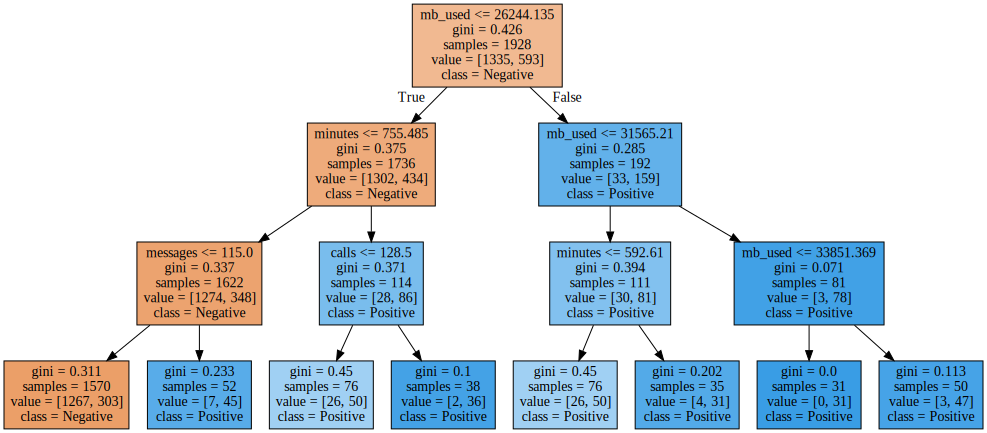

In [17]:
graph = Source(tree.export_graphviz(best_model_dt, out_file=None,
                               feature_names=list(features_train),
                               class_names=['Negative', 'Positive'],
                               filled=True))
display(SVG(graph.pipe(format='svg')))